## $\pi$ Estimation with MC Simulation

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

In [19]:
n_sample = int(1e4)*2
red_count = 0
blue_count = 0

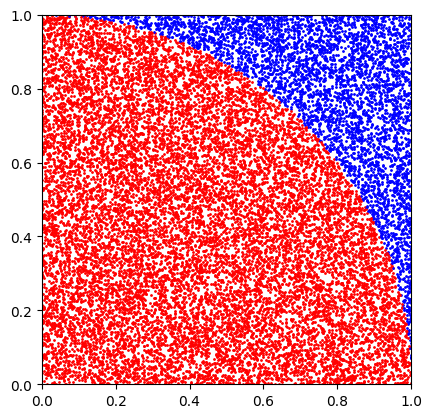

In [20]:
plt.figure()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')

dot_size = 1

for _ in range(n_sample):
    x = np.random.rand()
    y = np.random.rand()

    if x**2 + y**2 <= 1:
        plt.scatter(x, y, color='red', s=dot_size)
        red_count += 1
    else:
        plt.scatter(x, y, color='blue', s=dot_size)
        blue_count += 1

plt.show()

In [22]:
pi_estimation = red_count/n_sample * 4
print(f"pi Value Estimated by MC Simulation is\n{pi_estimation}")

pi Value Estimated by MC Simulation is
3.136


## Confidence Interval v. Credible Interval

우리가 8시간 이상 자는 대학생들의 비율 $\theta$에 관심이 있다고 하자.

ESC 학생들 중 무작위로 10명을 골라 수면시간을 물어보았더니, 그 중 3명의 학생들이 8시간 이상을 잔다고 응답하였다. 8시간 이상 수면한다고 응답한 학생들의 수를 $X$라는 확률변수로 표현하면, $X$는 다음과 같은 이항분포를 따른다:
$$X\sim B(10,\theta)$$ 

일반적으로 대학생들은 자신의 젊음으로 얻어낸 건강한 신체만 믿고 잠을 잘 자지 않으므로, $\theta$의 분포가 $\text{Beta}(2,5)$를 따른다고 믿는다고 하자. 즉, prior distribution $p(\theta)$가 다음과 같은 것이다:
$$\theta\sim\text{Beta}(2,5)$$

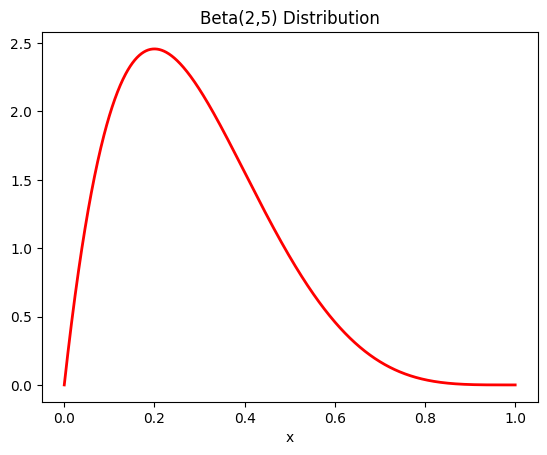

In [27]:
a = 2; b = 5
x = np.linspace(0, 1, 1000)
pdf = stat.beta.pdf(x, 2, 5)

plt.plot(x, pdf, 'r-', lw=2, label=f'Beta({a},{b}) Distribution')
plt.title(f"Beta({a},{b}) Distribution")
plt.xlabel('x')
plt.ylabel('')
plt.show()

참고로 $\text{Beta}(2,5)$의 평균값은 약 $0.29$이다. $$\frac{a}{a+b}=\frac{2}{2+5}\simeq 0.29$$

또한 **likelihood**, 즉, $X$의 분포는 $$X\sim B(10,\theta)$$이므로 Conjugacy에 의해 posterior distribution은 다음과 같은 분포를 따르게 된다:
$$\theta|X \sim \text{Beta}(3+2,7+5)=\text{Beta}(5,12)$$

이제 $\theta$에 대한 90% Credible Interval를 구해보자. 즉,
$$\int_{a}^{b} \text{Beta}(5,12)dx=0.9$$
인 closed interval $[a,b]$를 구하자는 것이다.

그런데 우리가 $\text{Beta}(5,12)$의 pdf를 그려보면,
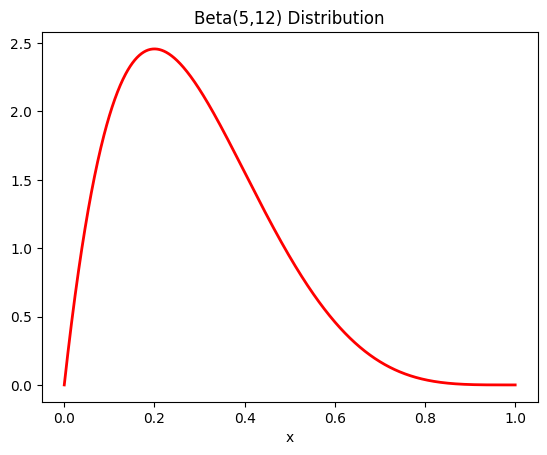  
와 같음을 확인할 수 있다.

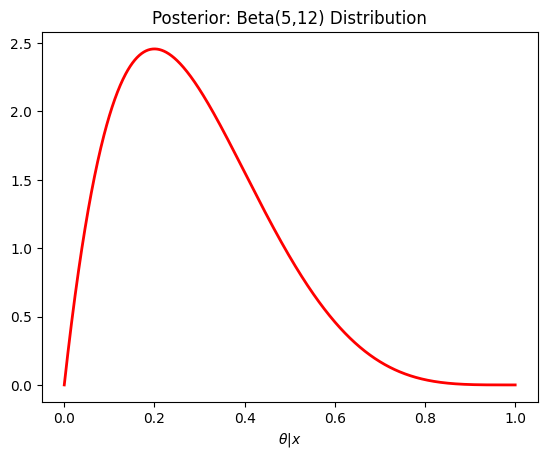

In [35]:
a = 5; b = 12
x = np.linspace(0, 1, 1000)
pdf = stat.beta.pdf(x, 2, 5)

plt.plot(x, pdf, 'r-', lw=2, label=f'Beta({a},{b}) Distribution')
plt.title(f"Posterior: Beta({a},{b}) Distribution")
plt.xlabel('$\\theta|x$')
plt.ylabel('')
plt.show()

그런데 사실 적분값이 0.9가 되도록 하는 구간은 무수히 많다. 따라서 이 중 구간의 간격이 가장 짧은 것을 **HDI** (Highest Density Interval)이라고 부른다.

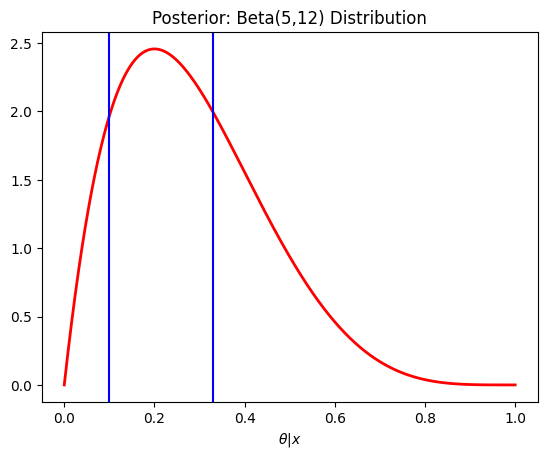

In [40]:
a = 5; b = 12
x = np.linspace(0, 1, 1000)
pdf = stat.beta.pdf(x, 2, 5)

plt.plot(x, pdf, 'r-', lw=2, label=f'Beta({a},{b}) Distribution')
plt.axvline(x=0.10, c='blue')
plt.axvline(x=0.33, c='blue')

plt.title(f"Posterior: Beta({a},{b}) Distribution")
plt.xlabel('$\\theta|x$')
plt.ylabel('')
plt.show()

그렇다면, 이러한 Credible Interval과 Confidence Interval은 어떤 차이가 있을까?

**Confidence Interval**  
$\mu$가 $[a,b]$에 포함될 확률이 $95%$이다. (X)  
$[a,b]$가 $\mu$를 포함될 확률이 $95%$이다. (O)

$\mu$를 통계량으로 가지는 확률변수에 대한 정보도 없이, $p(\mu\in [a,b])=.95$인 구간을 찾아달라고 묻는다면 답할 수 없다.

Frequentist 관점에서 $\mu$는 고정된 상수이고, 표본에 따라 달라지는 것은 신뢰구간이다. 즉, 하나의 신뢰구간을 만들고 이 신뢰구간이 아직 만들지 않은 나머지 신뢰구간과 비슷할 것이라고 보는 것이다.

결론적으로 Credible Interval은 아직 알지 못하는 표본은 신경쓰지 않고, 가진 정보 내에서 최대한 그럴싸한 답을 내놓는 것이고, Confidence Interval은 CLT에 의해, 무한번 표본 추출을 반복하였을 때 샘플링의 95%가 신뢰 구간에 $\mu$를 담고 있을 것이다.